## NAIME BAYES

https://www.datacamp.com/tutorial/naive-bayes-scikit-learn

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


In [22]:
# Creem dades aleatòries 800 files amb 6 columnes
X, y = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=800,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)
features = [x for x in "ABCDEF"]

In [23]:
print(features)
X[0]


['A', 'B', 'C', 'D', 'E', 'F']


array([ 1.34076287, -1.21573796, -0.06929943,  0.84542643, -0.76549575,
       -1.31889683])

Text(0, 0.5, 'B')

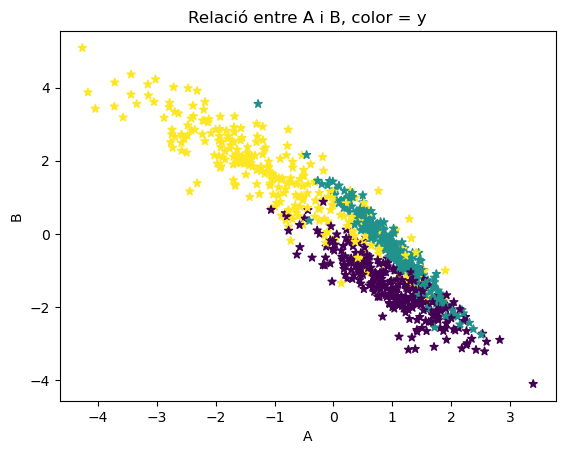

In [24]:
# Muy mono 
plt.scatter(X[:, 0], X[:, 1], c=y, marker="*") # Agafa totes les files i les columnes A i B.
plt.title("Relació entre A i B, color = y")
plt.xlabel("A")
plt.ylabel("B")

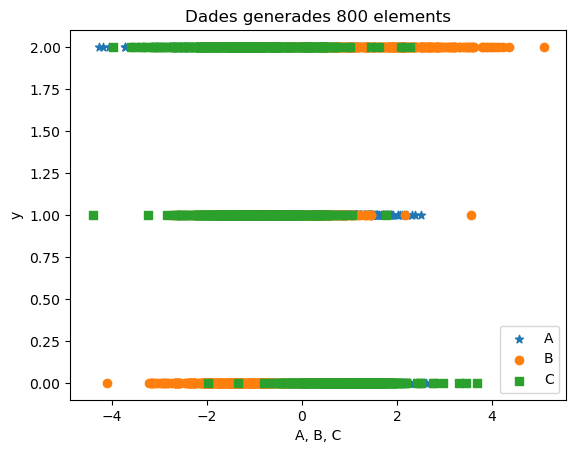

In [25]:
# Tres columnes relacionant amb la y
plt.scatter(X[:, 0], y, marker="*", label = "A");
plt.scatter(X[:, 1], y, marker="o", label = "B");
plt.scatter(X[:, 2], y, marker="s", label = "C");
plt.title("Dades generades 800 elements")
plt.xlabel("A, B, C")
plt.ylabel("y")
plt.legend()


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)
print (len (X_train), len(X_test))

536 264


In [27]:
# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
n = 6
predicted = model.predict([X_test[n]])

print("Actual Value:", y_test[n],  "Predicted Value:", predicted)

# Fes 12 prediccions aleatòries

for i in np.random.randint(0, len(y_test), 12):
    predicted = model.predict([X_test[i]])
    print(i, "Actual Value:", y_test[i],  "Predicted Value:", predicted)
    

Actual Value: 0 Predicted Value: [0]
238 Actual Value: 1 Predicted Value: [0]
201 Actual Value: 1 Predicted Value: [1]
65 Actual Value: 1 Predicted Value: [1]
238 Actual Value: 1 Predicted Value: [0]
245 Actual Value: 1 Predicted Value: [1]
155 Actual Value: 1 Predicted Value: [1]
108 Actual Value: 2 Predicted Value: [2]
57 Actual Value: 1 Predicted Value: [1]
143 Actual Value: 1 Predicted Value: [1]
48 Actual Value: 0 Predicted Value: [0]
142 Actual Value: 0 Predicted Value: [0]
133 Actual Value: 2 Predicted Value: [2]


In [28]:
# Métriques d' avaluació del model (exactitud i f1)
#
from sklearn.metrics import ( accuracy_score, f1_score, confusion_matrix,
                              ConfusionMatrixDisplay
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)


Accuracy: 0.8484848484848485
F1 Score: 0.8491119695890328


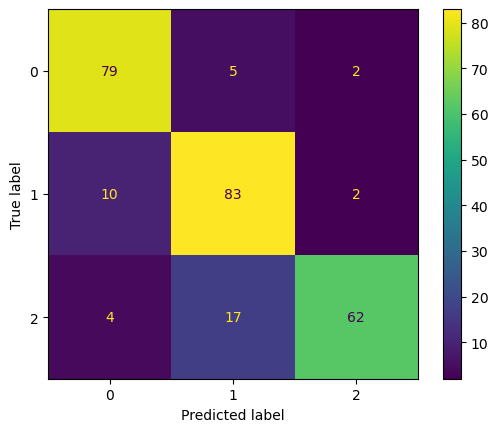

In [29]:
from sklearn.metrics import ( accuracy_score, f1_score, confusion_matrix,
                              ConfusionMatrixDisplay
)

labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [30]:
import pandas as pd

df = pd.read_csv('./dat/loan_data.csv')
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
